EXPLORATORY DATA ANALYSIS

Objectives:
-Explore features or characteristics to predict price of car
-Analyze patterns and run descriptive statistical analysis
-Group data based on identified parameters and create pivot tables
-Identify the effect of independent attributes on price of cars

In [1]:
# Import Data from Cleansed Data in Module 2

# Setup - import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
from config import filepath
import seaborn as sns

In [2]:
# Load the data and store it in dataframe df
df = pd.read_csv(filepath)
df.head()

,Unnamed: 0,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,highway-L/100km,price,city-L/100km,horsepower-binned,diesel,gas,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,...,8.703704,13495.0,11.190476,Low,False,True,False,True,True,False
1,1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,...,8.703704,16500.0,11.190476,Low,False,True,False,True,True,False
2,2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,...,9.038462,16500.0,12.368421,Medium,False,True,False,True,True,False
3,3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,...,7.833333,13950.0,9.791667,Low,False,True,False,True,True,False
4,4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,...,10.681818,17450.0,13.055556,Low,False,True,False,True,True,False


Analyzing Individual Feature Patterns Using Visualization

How to choose the right visualization method?
When visualizing individual variables, it is important to first understand what type of variable you are dealing with. This 
will help us find the right visualization method for that variable.

In [3]:
# List the data types for each column
df.dtypes

Unnamed: 0             int64
symboling              int64
normalized-losses      int64
make                  object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int64
peak-rpm             float64
city-mpg               int64
highway-L/100km      float64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                  bool
gas                     bool
fuel-type-diesel        bool
fuel-type-gas           bool
aspiration-std          bool
aspiration-turbo        bool
dtype: object

In [4]:
# Data type of column "peak-rpm"

df["peak-rpm"].dtypes

dtype('float64')

We can calculate the correlation between variables of type "int64" or "float64" using the method "corr":
df.corr()

The diagonal elements are always one.

In [5]:
# Find the correlation between the following columns: bore, stroke, compression-ratio, and horsepower
df[["bore", "stroke", "compression-ratio", "horsepower"]].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001263,0.566903
stroke,-0.055390,1.000000,0.187871,0.098128
compression-ratio,0.001263,0.187871,1.000000,-0.214489
horsepower,0.566903,0.098128,-0.214489,1.000000


Continuous Numerical Variables:

Continuous numerical variables are variables that may contain any value within some range. They can be of type "int64" 
or "float64". A great way to visualize these variables is by using scatterplots with fitted lines.

In order to start understanding the (linear) relationship between an individual variable and the price, we can use "regplot" 
which plots the scatterplot plus the fitted regression line for the data. This will be useful later on for visualizing the fit 
of the simple linear regression model as well.

(0.0, 53428.020422418136)

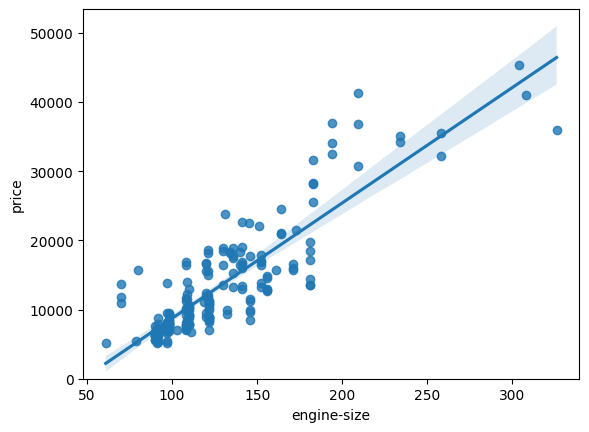

In [6]:
# POSITIVE LINEAR RELATIONSHIP
# Find the scatterplot of "engine-size" and "price"
# Engine size as potential predictor variable of price
sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)

<Axes: xlabel='highway-L/100km', ylabel='price'>

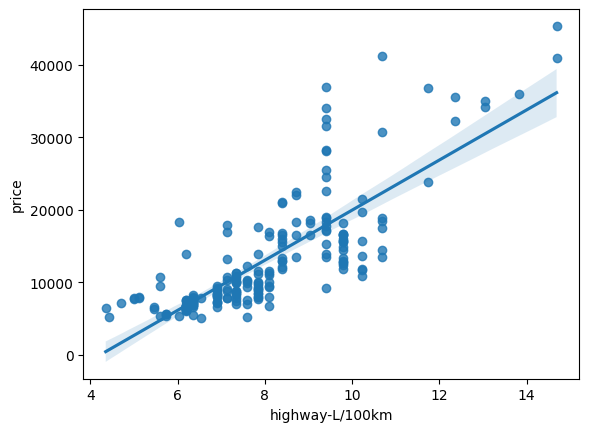

In [7]:
# Find the scatterplot of "highway-L/100km" and "price"
sns.regplot(x="highway-L/100km", y="price", data=df)


<Axes: xlabel='peak-rpm', ylabel='price'>

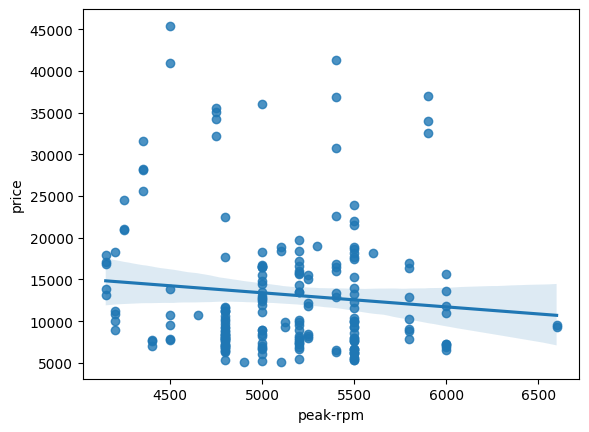

In [8]:
# WEAK LINEAR RELATIONSHIP
# Check if "peak-rpm" is a predictor variable of "price"
sns.regplot(x="peak-rpm", y="price", data=df)

Peak rpm is not a good predictor of the price since the regression line is close to horizontal. The data points are very 
scattered and far from the fitted line, showing lots of variability.
Not a reliable variable.

In [9]:
# Check the correlation between "peak-rpm" and "price"
df[["peak-rpm", "price"]].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


In [10]:
# Find the correlation between x="stroke" and y="price"
df[["stroke", "price"]].corr()

#The correlation is 0.0823, the non-diagonal elements of the table.

,stroke,price
stroke,1.000000,0.082269
price,0.082269,1.000000


<Axes: xlabel='stroke', ylabel='price'>

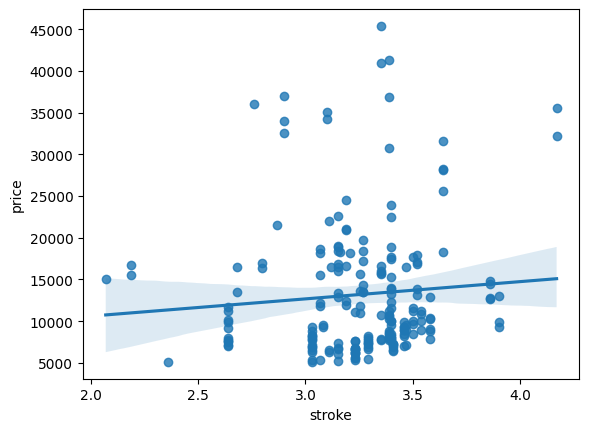

In [11]:
# Verify the linear relationship between "price" and "stroke"
sns.regplot(x="stroke", y="price", data=df)

#There is a weak correlation between the variable 'stroke' and 'price.' as such regression will not work well.

CATEGORICAL VARIABLES
These are variables that describe a 'characteristic' of a data unit, and are selected from a small group of categories.
The categorical variables can have the type "object" or "int64". A good way to visualize categorical variables is by 
using boxplots.

<Axes: xlabel='body-style', ylabel='price'>

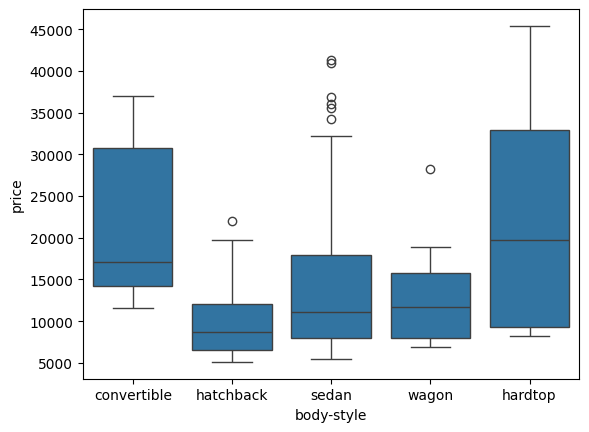

In [12]:
# Look at the relationship between "body-style" and "price"
sns.boxplot(x="body-style", y="price", data=df)

# We see that the distributions of price between the different body-style categories have a significant overlap, so body-style 
# would not be a good predictor of price. 

<Axes: xlabel='engine-location', ylabel='price'>

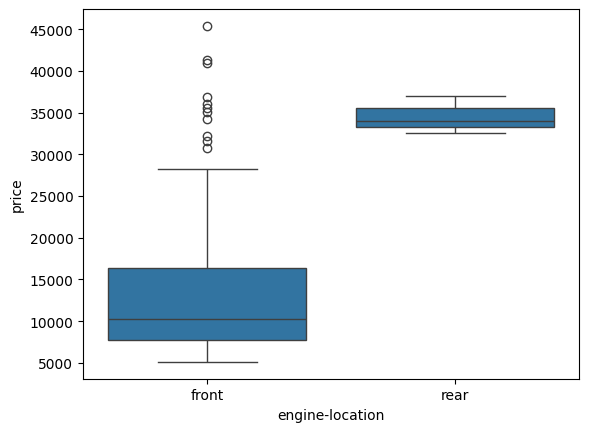

In [13]:
# Let's examine engine "engine-location" and "price"
sns.boxplot(x="engine-location", y="price", data=df)

# Here we see that the distribution of price between these two engine-location categories, front and rear, are distinct enough 
# to take engine-location as a potential good predictor of price.

<Axes: xlabel='drive-wheels', ylabel='price'>

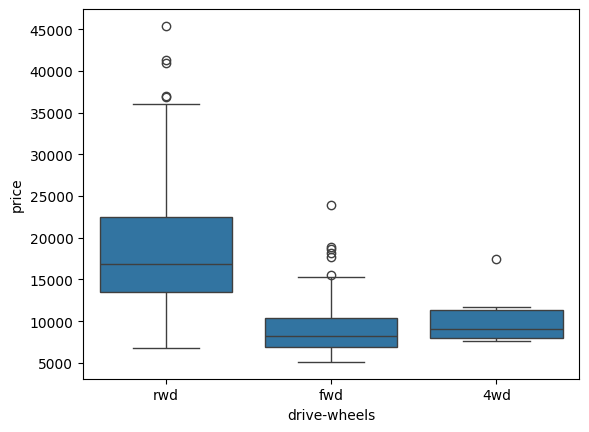

In [14]:
# Let's examine "drive-wheels" and "price"
sns.boxplot(x="drive-wheels", y="price", data=df)

# the distribution of price between the different drive-wheels categories differ
# drive-wheels could potentially be a predictor of price.

DESCRIPTIVE STATISTICAL ANALYSIS
The describe function automatically computes basic statistics for all continuous variables. Any NaN values are 
automatically skipped in these statistics.

the count of that variable
the mean
the standard deviation (std)
the minimum value
the IQR (Interquartile Range: 25%, 50% and 75%)
the maximum value

In [15]:
# Apply the method .describe()
df.describe()

# The default setting of "describe" skips variables of type object. 

,Unnamed: 0,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km
count,201.000000,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,100.000000,0.840796,122.00000,98.797015,0.837102,0.915126,0.899108,2555.666667,126.875622,3.330692,3.256874,10.164279,103.402985,5117.665368,25.179104,8.044957,13207.129353,9.944145
std,58.167861,1.254802,31.99625,6.066366,0.059213,0.029187,0.040933,517.296727,41.546834,0.268072,0.316048,4.004965,37.365650,478.113805,6.423220,1.840739,7947.066342,2.534599
min,0.000000,-2.000000,65.00000,86.600000,0.678039,0.837500,0.799331,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,4.351852,5118.000000,4.795918
25%,50.000000,0.000000,101.00000,94.500000,0.801538,0.890278,0.869565,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,6.911765,7775.000000,7.833333
50%,100.000000,1.000000,122.00000,97.000000,0.832292,0.909722,0.904682,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,7.833333,10295.000000,9.791667
75%,150.000000,2.000000,137.00000,102.400000,0.881788,0.925000,0.928094,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,9.400000,16500.000000,12.368421
max,200.000000,3.000000,256.00000,120.900000,1.000000,1.000000,1.000000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,14.687500,45400.000000,18.076923


In [16]:
# apply the method "describe" on the variables of type 'object'
df.describe(include=['object'])

,make,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201
unique,22,2,5,3,2,6,7,8,3
top,toyota,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,115,94,118,198,145,157,92,153


VALUE COUNTS
-a good way of understanding how many units of each characteristic/variable we have.
-apply .value_counts() method on the column.
-value_counts only works on pandas series and not pandas dataframes, we only include one bracket df['drive-wheels'], 
not two brackets df[['drive-wheels']].

In [17]:
df["drive-wheels"].value_counts()

drive-wheels
fwd    118
rwd     75
4wd      8
Name: count, dtype: int64

In [19]:
# Convert the series to a dataframe
drive_wheels_counts = df["drive-wheels"].value_counts().to_frame()
drive_wheels_counts.rename(columns={"drive-wheels":"value_counts"}, inplace=True)
drive_wheels_counts

,count
drive-wheels,
fwd,118
rwd,75
4wd,8


In [20]:
# rename the index to "drive-wheels"
drive_wheels_counts.index.name = "drive-wheels"
drive_wheels_counts

,count
drive-wheels,
fwd,118
rwd,75
4wd,8


In [21]:
# apply value_counts to "engine-location"
engine_loc_counts = df["engine-location"].value_counts().to_frame()
engine_loc_counts.rename(columns={"engine-location":"value_counts"}, inplace=True)
engine_loc_counts.index.name = "engine-location"
engine_loc_counts

,count
engine-location,
front,198
rear,3


BASIC GROUPING
-"groupby" method groups data by different categories
-data is grouped based on one or several variables
-analysis is performed on the individual groups

In [22]:
# let's group variable "drive-wheels"
df["drive-wheels"].unique()

# we see that there are 3 different categories of dive wheels

array(['rwd', 'fwd', '4wd'], dtype=object)

In [ ]:
# check, on average, which type of drive wheel is most valuable
# group "drive-wheels" and then average them
# select columns "drive-wheels", "body-style", "price" then assign it to variable "df_group_one"
df_group_one = df[['drive-wheels','body-style','price']]

# grouping results
df_group_one = df_group_one.groupby(['drive-wheels'],as_index=False).mean()
df_group_one

In [45]:
#  group by multiple variables
# grouping results
df_gptest = df[['drive-wheels','body-style','price']]
grouped_test1 = df_gptest.groupby(['drive-wheels','body-style'],as_index=False).mean()
grouped_test1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


Grouped data is much easier to visualize when it is made into a pivot table. A pivot table is like an Excel spreadsheet, with 
one variable along the column and another along the row.

In [26]:
# convert dataframe to a pivot
# leave the drive-wheels variable as the rows of the table and pivot body-style to become the columns of the table
grouped_pivot = grouped_test1.pivot(index="drive-wheels", columns="body-style")
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [27]:
# fill missing cells with the value 0
grouped_pivot = grouped_pivot.fillna(0)
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [28]:
# find the average "price" of each car based on the "body-style" using "groupby" function
df_gptest2 = df[["body-style", "price"]]
grouped_test_bodystyle = df_gptest2.groupby(["body-style"], as_index=False).mean()
grouped_test_bodystyle

,body-style,price
0,convertible,21890.500000
1,hardtop,22208.500000
2,hatchback,9957.441176
3,sedan,14459.755319
4,wagon,12371.960000


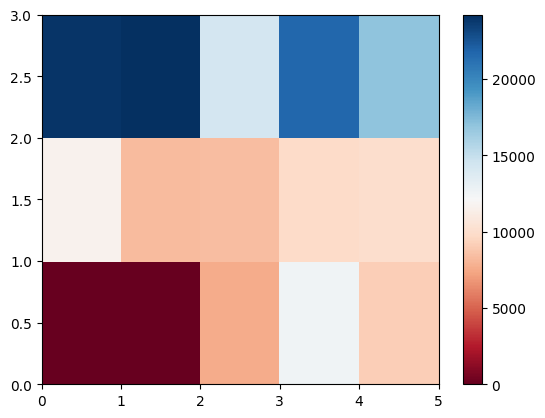

In [29]:
# VARIABLES: DRIVE WHEELS AND BODY STYLE VS PRICE
# use heat map to visualize the relationship between Body Style and Price
# use the grouped results
plt.pcolor(grouped_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

# The heatmap plots the target variable (price) proportional to colour with respect to the variables 'drive-wheel' and 'body-style' on the vertical and horizontal axis, respectively. This allows us to visualize how the price is related to 'drive-wheel' and 'body-style'.

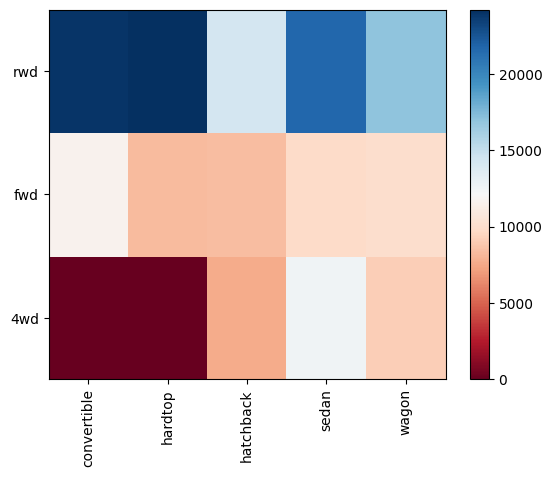

In [51]:
# change default labels to convey useful information

fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

The main question we want to answer in this module is, "What are the main characteristics which have the most impact on the 
car price?".

To get a better measure of the important characteristics, we look at the correlation of these variables with the car price. 
In other words: how is the car price dependent on this variable?

Correlation and Causation:

Correlation: a measure of the extent of interdependence between variables.

Causation: the relationship between cause and effect between two variables.

Pearson Correlation

The Pearson Correlation measures the linear dependence between two variables X and Y.

The resulting coefficient is a value between -1 and 1 inclusive, where:

1: Perfect positive linear correlation.

0: No linear correlation, the two variables most likely do not affect each other.

-1: Perfect negative linear correlation.

df.corr()

P-value

What is this P-value? The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.

By convention, when the

p-value is  
<
  0.001: we say there is strong evidence that the correlation is significant.
the p-value is  
<
  0.05: there is moderate evidence that the correlation is significant.
the p-value is  
<
  0.1: there is weak evidence that the correlation is significant.

the p-value is  
>
  0.1: there is no evidence that the correlation is significant.

In [32]:
# We can obtain this information using "stats" module in the "scipy" library.
from scipy import stats

In [34]:
# WHEEL BASE VS PRICE
# Calculate the Pearson Correlation Coefficient and P-value of the "wheel-basse" and "price"
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df["price"])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-vlaue of P = ", p_value)

# Conclusion:
# Since the p-value is <0.001, the correlation between wheel-base and price is statistically significant, although the linear relationship isn't extremely strong (~0.585).

The Pearson Correlation Coefficient is 0.584641822265508  with a P-vlaue of P =  8.076488270732947e-20


In [35]:
# HORSEPOWER VS PRICE
# Calculate the Pearson Correlation Coefficient and the P-value of "horsepower" and "price"
pearson_coef2, p_value2 = stats.pearsonr(df["horsepower"], df["price"])
print("The Pearson Correlation Coefficient is", pearson_coef2, " with a P-value of P = ", p_value2)

# Conclusion:
# Since the p-value is <0.001, the correlation between horsepower and price is statistically significant, and the linear relationship is quite strong (~0.809, close to 1).

The Pearson Correlation Coefficient is 0.8096068016571054  with a P-value of P =  6.273536270650436e-48


In [36]:
# lENGTH VS PRICE
# Calculate the Pearson Correlation Coefficient and P-value of "length" and "price"
pearson_coef3, p_value3 = stats.pearsonr(df["length"], df["price"])
print("The Pearson Correlation Coefficient is", pearson_coef3, " with a P-value of P = ", p_value3)

# Conclusion:
# Since the p-value is  <0.001, the correlation between length and price is statistically significant, and the linear relationship is moderately strong (~0.691).

The Pearson Correlation Coefficient is 0.6906283804483639  with a P-value of P =  8.016477466159153e-30


In [37]:
# WIDTH VS PRICE
# Calculate the Pearson Correlation Coefficient and P-value of "width" and "price"
pearson_coef4, p_value4 = stats.pearsonr(df["width"], df["price"])
print("The Pearson Correlation COefficient is", pearson_coef4, "with a P-value of P = ", p_value4)

# Conclusion:
# Since the p-value is < 0.001, the correlation between width and price is statistically significant, and the linear relationship is quite strong (~0.751).

The Pearson Correlation COefficient is 0.7512653440522673 with a P-value of P =  9.200335510482065e-38


In [38]:
# CURB-WEIGHT VS PRICE
# Calculate the Pearson Correlation Coefficient and P-value of "curb-weight" and "price"
pearson_coef5, p_value5 = stats.pearsonr(df["curb-weight"], df["price"])
print("THe Pearson Correlation Coefficient is", pearson_coef5, "with a P-value of P = ", p_value5)

# Conclusion:
# Since the p-value is <0.001, the correlation between curb-weight and price is statistically significant, and the linear relationship is quite strong (~0.834).

THe Pearson Correlation Coefficient is 0.8344145257702843 with a P-value of P =  2.189577238893972e-53


In [39]:
# Engine-Size vs. Price
# Calculate the Pearson Correlation Coefficient and P-value of 'engine-size' and 'price':
pearson_coef6, p_value6 = stats.pearsonr(df['engine-size'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef6, " with a P-value of P =", p_value6) 

# Conclusion:
# Since the p-value is <0.001, the correlation between engine-size and price is statistically significant, and the linear relationship is very strong (~0.872).

The Pearson Correlation Coefficient is 0.8723351674455182  with a P-value of P = 9.265491622200262e-64


In [40]:
# Bore vs. Price
# Calculate the Pearson Correlation Coefficient and P-value of 'bore' and 'price':
pearson_coef7, p_value7 = stats.pearsonr(df['bore'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef7, " with a P-value of P =  ", p_value7 ) 

# Conclusion:
# Since the p-value is < 0.001, the correlation between bore and price is statistically significant, but the linear relationship is only moderate (~0.543).

The Pearson Correlation Coefficient is 0.5431553832626603  with a P-value of P =   8.04918948393533e-17


In [41]:
# City-mpg vs. Price
pearson_coef8, p_value8 = stats.pearsonr(df['city-mpg'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef8, " with a P-value of P = ", p_value8) 

# Conclusion:¶
# Since the p-value is < 0.001, the correlation between city-mpg and price is statistically significant, and the coefficient of about -0.687 shows that the relationship is negative and moderately strong.

The Pearson Correlation Coefficient is -0.6865710067844678  with a P-value of P =  2.321132065567512e-29


In [43]:
# Highway-L/100km vs. Price
pearson_coef9, p_value9 = stats.pearsonr(df['highway-L/100km'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef9, " with a P-value of P = ", p_value9 ) 

# Conclusion:
# Since the p-value is < 0.001, the correlation between highway-mpg and price is statistically significant, and the coefficient of about 0.801 shows that the relationship is positive and very strong.

The Pearson Correlation Coefficient is 0.8011176263981973  with a P-value of P =  3.046784581041407e-46


Conclusion: Important Variables

We now have a better idea of what our data looks like and which variables are important to take into account when predicting the car price. We have narrowed it down to the following variables:

Continuous numerical variables:

Length

Width

Curb-weight

Engine-size

Horsepower

City-mpg

Highway-mpg

Wheel-base

Bore

Categorical variables:

Drive-wheels

As we now move into building machine learning models to automate our analysis, feeding the model with variables that meaningfully affect our target variable will improve our model's prediction performance.